## Capital Asset Pricing Model (CAPM)

You are provided with the historical prices of Alphabet and S&P500 index. As a portfolio manager, you are required to estimate the returns of the security, and also understand the volatility in the stocks in comparison to the overall market. Use the CAPM  to execute both the tasks. Here, we will try to fit a regression model between the two series and relate it with the CAPM model.

#### Reading data into Python

In [1]:
# importing all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Loading the csv files into dataframe
amazon = pd.read_csv('GOOG.csv',parse_dates=True, index_col='Date')
sp500 = pd.read_csv('GSPC.csv', parse_dates=True, index_col='Date')

In [3]:
# joining the two datasets 
prices = pd.concat([amazon['Close'], sp500['Close']], axis=1)
prices.columns = ['google', 'sp500']

In [4]:
# Checking the dataframe
prices.head()

,google,sp500
Date,,
2010-10-01,261.828613,1146.239990
2010-10-04,260.199707,1137.030029
2010-10-05,268.110046,1160.750000
2010-10-06,266.177307,1159.969971
2010-10-07,264.015411,1158.060059


In [5]:
# Calculating the daily returns
returns = prices.pct_change(1)

# Dropping the rows with missing values
returns = returns.dropna(axis=0)
returns.head()

,google,sp500
Date,,
2010-10-04,-0.006221,-0.008035
2010-10-05,0.030401,0.020861
2010-10-06,-0.007209,-0.000672
2010-10-07,-0.008122,-0.001647
2010-10-08,0.011962,0.006122


<AxesSubplot:xlabel='Date'>

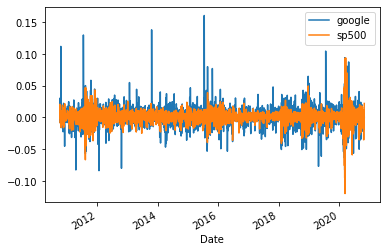

In [6]:
# Plotting the series to understand the correlation
returns.plot()

In [23]:
# Average daily return from each stock
daily_returns_mean = returns.mean()
print(daily_returns_mean)

google    0.000822
sp500     0.000493
dtype: float64


In [32]:
# Cumulative Return for an investor if he/she bought the stocks on 2013-01-07 (7th January 2013)
new = returns.loc["2013-01-07":, :]

# Cumulative return from the portfolio
cumulative_returns = (1+new).cumprod()
cumulative_returns.tail(5)

,google,sp500
Date,,
2020-10-29,4.121846,2.257196
2020-10-30,4.121846,2.229817
2020-11-02,4.121846,2.257285
2020-11-03,4.121846,2.297463
2020-11-04,4.121846,2.348115


#### Preparing the data for linear regression

In [ ]:
# Importing the library
import statsmodels.api as sm

In [7]:
# spllitting the data into dependent variable (Return on security) and independent variable (Return on market benchmark) 
google = returns['sp500']
sp500 = returns['google']

In [8]:
# Adding a constant for the regression equation
X = sm.add_constant(sp500)

In [9]:
# make regression model 
model = sm.OLS(sp500, X)

In [10]:
# Printing results to extract the values
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 google   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.256e+34
Date:                Thu, 03 Dec 2020   Prob (F-statistic):               0.00
Time:                        08:48:29   Log-Likelihood:                 96660.
No. Observations:                2541   AIC:                        -1.933e+05
Df Residuals:                    2539   BIC:                        -1.933e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.487e-20   1.45e-19      0.654      0.5

In [22]:
# Regression Equation
print("constant: " + str(results.params[0]))
print("Beta: " + str(results.params[1]))

print("\nEquation: " + "(Ri - Rf) = " + str(results.params[0]) + " + " + str(results.params[1]) + " * (Rm - Rf)" )

constant: 9.486769009248164e-20
Beta: 0.9999999999999996

Equation: (Ri - Rf) = 9.486769009248164e-20 + 0.9999999999999996 * (Rm - Rf)


__________________

**Image from Yahoo Finance:**

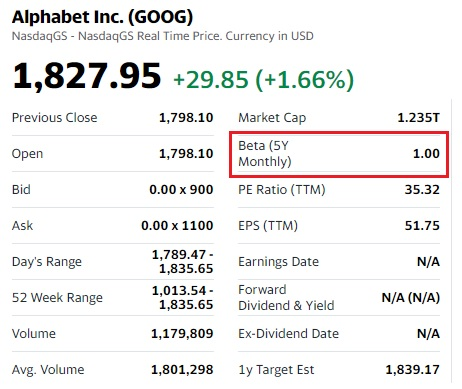